In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
c=load_breast_cancer()
input=c.data
target=c.target

In [4]:
dir(c)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
c.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
df=pd.DataFrame(input,columns=c.feature_names)
df['target']=target

In [7]:
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [8]:
x_train, x_test, y_train, y_test=train_test_split(input,target,test_size=0.2,random_state=42)

In [9]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
yp=knn.predict(x_test)

In [11]:
sample=x_test[0].reshape(1, -1)  
pred_class=knn.predict(sample)[0]  
print("Prediction for first test sample:",c.target_names[pred_class])
if c.target_names[pred_class]=="benign":
    print("Non-cancerous tumor")
else:
    print("Cancerous tumor")

Prediction for first test sample: benign
Non-cancerous tumor


In [12]:
#To identify exactly where the model makes incorrect predictions, we use a confusion matrix.
yp=knn.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,yp)
cm

array([[38,  5],
       [ 0, 71]], dtype=int64)

Text(20.72222222222222, 0.5, 'Truth')

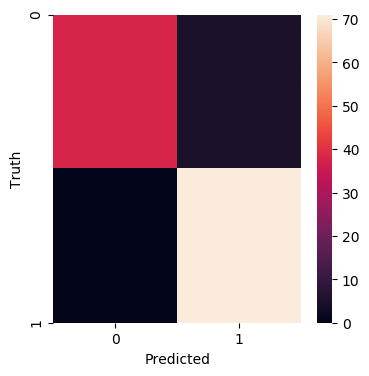

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(4,4))
sn.heatmap(cm)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [15]:
knn.score(input,target)

0.9437609841827768